In [ ]:
%pip install sklearn
%pip install matplotlib

## Iris Dataset

In [2]:
from sklearn import datasets
from pprint import pprint
irisData = datasets.load_iris()
pprint(irisData)

{'DESCR': '.. _iris_dataset:\n'
          '\n'
          'Iris plants dataset\n'
          '--------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 150 (50 in each of three classes)\n'
          '    :Number of Attributes: 4 numeric, predictive attributes and the '
          'class\n'
          '    :Attribute Information:\n'
          '        - sepal length in cm\n'
          '        - sepal width in cm\n'
          '        - petal length in cm\n'
          '        - petal width in cm\n'
          '        - class:\n'
          '                - Iris-Setosa\n'
          '                - Iris-Versicolour\n'
          '                - Iris-Virginica\n'
          '                \n'
          '    :Summary Statistics:\n'
          '\n'
          '    ============== ==== ==== ======= ===== ====================\n'
          '                    Min  Max   Mean    SD   Class Correlation\n'
          '  

In [3]:
print('feature names:',irisData.feature_names)
print('target names:',irisData.target_names)
print('data shape:',irisData.data.shape)

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']
data shape: (150, 4)


#### How many instance in each class:

In [4]:
for i in range(3):
  print("- Number of instances in classe " +str(i)+" is: " )
  print( len(irisData.target[irisData.target==i]))

- Number of instances in classe 0 is: 
50
- Number of instances in classe 1 is: 
50
- Number of instances in classe 2 is: 
50


#### Classe and attributs of 32th instance:

In [5]:
print("For instance 32: ")
print('class:',irisData.target[31])
print('attributs',irisData.data[31])

For instance 32: 
class: 0
attributs [5.4 3.4 1.5 0.4]


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


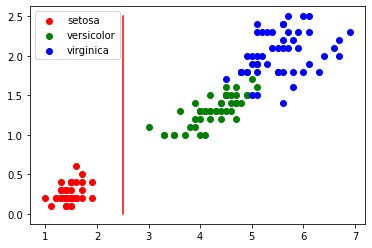

In [6]:
import pylab as pl
from itertools import cycle

def plot_2D(data, target, target_names):
  colors = cycle('rgbcmykw') # colors cycle
  target_ids = range(len(target_names))
  print(irisData.feature_names)
  pl.figure()
  for i, c, label in zip(target_ids, colors, target_names):
    pl.scatter(data[target == i,2], data[target == i,3], c=c, label=label)
  pl.plot([2.5,2.5],[0,2.5], c='r')
  pl.legend()
  pl.show()
plot_2D(irisData.data,irisData.target,irisData.target_names)

## First Classifier Training

predictions on the first 31 instances:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
real class values for the first 31 instances:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
prediction values:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
2


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


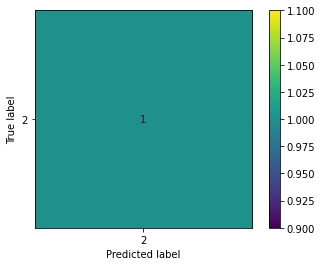

In [7]:
from sklearn import naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

nb = naive_bayes.MultinomialNB(fit_prior=True) # model initialization (naive_bayes model)
nb.fit(irisData.data[:-1], irisData.target[:-1]) # model training using the isris dataset 
p31 = nb.predict(irisData.data[:31]) # model test (prediction)
print('predictions on the first 31 instances:',p31,sep='\n')
print('real class values for the first 31 instances:',irisData.target[:31],sep='\n')
plast = nb.predict(irisData.data[:-1])
print('prediction values:\n',plast)
p = nb.predict(irisData.data[:])
print(p)
print(irisData.target[-1])
# The same dataset used for training is used for learning
irisData.data[-1]
y_pred=nb.predict(irisData.data[-1:])
accuracy_score(irisData.target[-1:],y_pred)
plot_confusion_matrix(nb,irisData.data[-1:], irisData.target[-1:])  
plt.show()

#### Second model

In [8]:
from sklearn import naive_bayes

nb = naive_bayes.MultinomialNB(fit_prior=True)

nb.fit(irisData.data[:99], irisData.target[:99]) # traning dataset is 2/3 of the actual dataset
prediction_result = nb.predict(irisData.data[100:149]) # Prediction (test) in done on the 1/3 left of the dataset

print("Prediction results:\n", prediction_result)
print("Actual results:\n", irisData.target[100:149])
print('=> Values are totally inconsistent, this could be explained since during the training phase the model was never exposed to the 3rd class (with index 2)')
print('The model should evenly get tranined on the 3 classes instances (approximately 33 instances for each class)')

Prediction results:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
Actual results:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]
=> Values are totally inconsistent, this could be explained since during the training phase the model was never exposed to the 3rd class (with index 2)
The model should evenly get tranined on the 3 classes instances (approximately 33 instances for each class)


## Classifier performance test

In [9]:
import numpy as np
# Training error is calculated through counting the different values between the real class values and the predicted one given the training set
nb.fit(irisData.data[:], irisData.target[:])
P = nb.predict(irisData.data[:])
Y = irisData.target
err_instances=[]
ea = 0
for i in range(len(irisData.data)):
  if (P[i] != Y[i]):
    err_instances.append(i)
    ea = ea+1
print('Training error is calculated through counting the different values between the real class values and the predicted one given the training set')
print("Error using sum function :",ea/len(irisData.data))
# non null values represent the falsy predicted values (errors)
print("Error using numpy :",np.count_nonzero(P-Y)/len(irisData.data),'(',"{:.1f}".format(((np.count_nonzero(P-Y)/len(irisData.data))*100)) ,'%)')

print("Accuracy : ",nb.score(irisData.data,Y),"( ","{:.1f}".format(nb.score(irisData.data,Y)*100)," %)")
print('Instances in which the model failed (flase prediction)\n',err_instances)
for i in err_instances:
    print('- ',irisData.data[i],'\t Real class:',Y[i],'\t predicted value',P[i])

Training error is calculated through counting the different values between the real class values and the predicted one given the training set
Error using sum function : 0.04666666666666667
Error using numpy : 0.04666666666666667 ( 4.7 %)
Accuracy :  0.9533333333333334 (  95.3  %)
Instances in which the model failed (flase prediction)
 [68, 70, 72, 83, 129, 131, 133]
-  [6.2 2.2 4.5 1.5] 	 Real class: 1 	 predicted value 2
-  [5.9 3.2 4.8 1.8] 	 Real class: 1 	 predicted value 2
-  [6.3 2.5 4.9 1.5] 	 Real class: 1 	 predicted value 2
-  [6.  2.7 5.1 1.6] 	 Real class: 1 	 predicted value 2
-  [7.2 3.  5.8 1.6] 	 Real class: 2 	 predicted value 1
-  [7.9 3.8 6.4 2. ] 	 Real class: 2 	 predicted value 1
-  [6.3 2.8 5.1 1.5] 	 Real class: 2 	 predicted value 1


### Classifier performances generalized

In [10]:
import numpy as np
def split(S):
    """ given a dataset, it will divide into into 2 thirds and one third (dataset already shuffeled) """ 
    number_instances = len(S.data) 
    indexes= np.arange(number_instances)
    np.random.shuffle(indexes) # indexes are shuffled
    training_indexes, test_indexes = indexes[:round(number_instances * (2/3))], indexes[round(number_instances * (2/3)):]
    train_data = list(filter(lambda i: i in training_indexes,training_indexes))
    test_data = list(filter(lambda i: i in test_indexes,test_indexes))
    dataS1 = np.array(list(map(lambda i: S.data[i].tolist(),train_data)))
    targetS1 = np.array(list(map(lambda i: S.target[i].tolist(),train_data)))
    dataS2 = np.array(list(map(lambda i: S.data[i].tolist(),test_data)))
    targetS2 = np.array(list(map(lambda i: S.target[i].tolist(),test_data)))
    return [dataS1,targetS1,dataS2,targetS2]
    
    
split(irisData)

[array([[6.2, 2.9, 4.3, 1.3],
        [6.3, 2.3, 4.4, 1.3],
        [6.3, 3.3, 4.7, 1.6],
        [5.4, 3.4, 1.7, 0.2],
        [6. , 2.9, 4.5, 1.5],
        [5.1, 3.3, 1.7, 0.5],
        [6.3, 2.5, 4.9, 1.5],
        [5.8, 2.7, 5.1, 1.9],
        [5.5, 2.4, 3.7, 1. ],
        [5.2, 3.4, 1.4, 0.2],
        [6.3, 2.5, 5. , 1.9],
        [6.9, 3.1, 5.4, 2.1],
        [6.4, 3.2, 4.5, 1.5],
        [4.8, 3. , 1.4, 0.3],
        [6.1, 2.6, 5.6, 1.4],
        [6.3, 2.9, 5.6, 1.8],
        [5. , 2.3, 3.3, 1. ],
        [5.9, 3. , 4.2, 1.5],
        [5.1, 3.5, 1.4, 0.2],
        [6.6, 2.9, 4.6, 1.3],
        [5.1, 3.5, 1.4, 0.3],
        [6.1, 3. , 4.6, 1.4],
        [5.2, 3.5, 1.5, 0.2],
        [6. , 3.4, 4.5, 1.6],
        [5. , 3.5, 1.6, 0.6],
        [6.1, 3. , 4.9, 1.8],
        [4.4, 3.2, 1.3, 0.2],
        [5. , 3.5, 1.3, 0.3],
        [5.5, 2.4, 3.8, 1.1],
        [5. , 3.3, 1.4, 0.2],
        [6.9, 3.2, 5.7, 2.3],
        [6.3, 2.8, 5.1, 1.5],
        [7. , 3.2, 4.7, 1.4],
        [5

In [11]:
from sklearn import naive_bayes

def training_error(clf,train_data,target):
    ea=1-clf.score(np.array(train_data),np.array(target))
    return ea
    

def test(S, clf):
    [dataS1, targetS1, dataS2, targetS2] = split(S)
    clf.fit(dataS1,targetS1)
    return training_error(clf,dataS2,targetS2)

print('For Multiple training,test sets:')
for i in range(5):
    error = test(irisData,naive_bayes.MultinomialNB(fit_prior=True))
    print('- Training error:', error ,'(',"{:.1f}".format(error*100),'%)')

print('=> Depending on the training/test set, the retrived error is smaller/bigger compared to the error retrived when the test is done on the same train dataset')

For Multiple training,test sets:
- Training error: 0.14 ( 14.0 %)
- Training error: 0.42000000000000004 ( 42.0 %)
- Training error: 0.19999999999999996 ( 20.0 %)
- Training error: 0.040000000000000036 ( 4.0 %)
- Training error: 0.19999999999999996 ( 20.0 %)
=> Depending on the training/test set, the retrived error is smaller/bigger compared to the error retrived when the test is done on the same train dataset


In [12]:
def repeated_test(S,nb, t):
  result = 0
  for i in range(t):
    result += test(S,nb)
  return result / t

S,nb = irisData, naive_bayes.MultinomialNB(fit_prior=True)

for t in [10,50,100,200,500,1000]:
  print(f"t = {t} | moyenne = {repeated_test(S,nb, t)}")

t = 10 | moyenne = 0.162
t = 50 | moyenne = 0.23920000000000002
t = 100 | moyenne = 0.18859999999999993
t = 200 | moyenne = 0.20980000000000001
t = 500 | moyenne = 0.20572000000000001
t = 1000 | moyenne = 0.19930000000000042


In [13]:
for t in [10,50,100,200,500,1000]:
  moy = 0
  for i in range(20):
    moy += repeated_test(S,nb, t)
  print(f"t = {t} | 20 fois | moyenne = {moy/20}")

print('- Training error is stable')
print('The larger the training set, the more the mean rate of training error is converging to the rate of real error')

t = 10 | 20 fois | moyenne = 0.1849
t = 50 | 20 fois | moyenne = 0.20032
t = 100 | 20 fois | moyenne = 0.20633999999999997
t = 200 | 20 fois | moyenne = 0.19881999999999997
t = 500 | 20 fois | moyenne = 0.1991100000000002
t = 1000 | 20 fois | moyenne = 0.20112900000000017
- Training error is stable
The larger the training set, the more the mean rate of training error is converging to the rate of real error


In [14]:
from sklearn.model_selection import train_test_split
sizes=[0.1,0.25,0.33,0.5]
for test_size in sizes:
  X_train, X_test, y_train, y_test = train_test_split( irisData.data,irisData.target,test_size=test_size)
  nb.fit(X_train,y_train)
  y_pred=nb.predict(X_test)
  print("- Training error for a training set of size ", test_size,": ",training_error(nb,X_test,y_test))

- Training error for a training set of size  0.1 :  0.19999999999999996
- Training error for a training set of size  0.25 :  0.07894736842105265
- Training error for a training set of size  0.33 :  0.07999999999999996
- Training error for a training set of size  0.5 :  0.16000000000000003


#### Error estimation through cross-validation

In [24]:
from sklearn.model_selection import cross_val_score
from pprint import pprint
folds=[2,3,5,8]
for i in folds:
  cross_validation_score = cross_val_score(nb,irisData.data,irisData.target,cv=i)
  print('* for',i,'folds,','score:',cross_validation_score,',\t error:',1-cross_validation_score)
  print('------------------------------------------------------------------------------------------------------------------')


* for 2 folds, score: [0.96       0.94666667] ,	 error: [0.04       0.05333333]
------------------------------------------------------------------------------------------------------------------
* for 3 folds, score: [0.96 0.92 0.96] ,	 error: [0.04 0.08 0.04]
------------------------------------------------------------------------------------------------------------------
* for 5 folds, score: [1.         0.96666667 0.9        0.9        1.        ] ,	 error: [0.         0.03333333 0.1        0.1        0.        ]
------------------------------------------------------------------------------------------------------------------
* for 8 folds, score: [1.         1.         0.94736842 0.89473684 0.89473684 0.84210526
 1.         1.        ] ,	 error: [0.         0.         0.05263158 0.10526316 0.10526316 0.15789474
 0.         0.        ]
------------------------------------------------------------------------------------------------------------------


Using a DecisionTreeClassifier:

In [16]:
from sklearn import tree
X, y = irisData.data, irisData.target
arb = tree.DecisionTreeClassifier()
print('Training error using the Decision tree classifier',test(irisData,arb))

Training error using the Decision tree classifier 0.020000000000000018


- The traning error metric is used to reflect the model accuracy
- This could be useful depending on the context, an help determine the best model
- In other use cases, precision or recall could be more important to determine the best model (situations in which the False Positive or False Negative should be minimal)